In [1]:
import torch
import matplotlib.pyplot as plt

from src.Transformer import KernelAttention as KA

C:\Users\janba\python-dev\attention_analysis\.venv\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


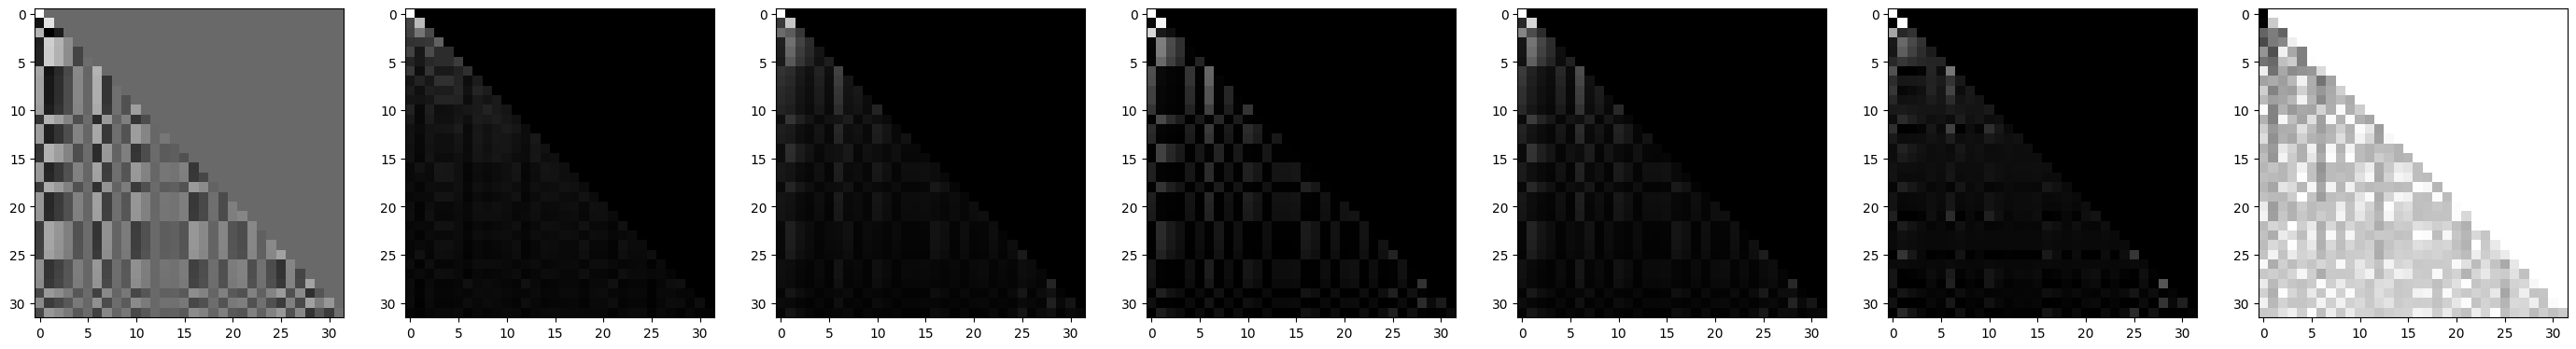

In [2]:
B, n_H, S, D = 1, 1, 32, 1

q = torch.randn(B, n_H, S, D)
k = torch.randn(B, n_H, S, D)
v = torch.randn(B, n_H, S, D)

mask = torch.tril(torch.ones((S, S)), diagonal=0)

attns = [
    KA.LinearKernelAttention(),
    KA.SEKernelAttention(),
    KA.PeriodicKernelAttention(period=10),
    KA.LocallyPeriodicKernelAttention(period=10),
    KA.RationalQuadraticKernelAttention(),
    KA.ImplicitKernelAttention(),
    KA.ChangePointKernelAttention(period=10)
]

fig, axes = plt.subplots(1, len(attns), figsize=(len(attns)*5, 5))

for ax, attn in zip(axes, attns):
    _ = attn(q, k, v, mask)
    ax.imshow(attn.attention_weight.detach().squeeze(), cmap='gray')

In [1]:
from src.Datasets.TrafficDataset import TrafficDataset
from src.Datasets.TourismDataset import TourismDataset
from src.Datasets.ElectricityDataset import ElectricityDataset

In [2]:
data = TrafficDataset.load()

data.dates.shape, data.ids.shape, data.values.shape

((10560,), (963,), (963, 10560))

In [5]:
data = TourismDataset.load()
data = ElectricityDataset.load()

In [6]:
data.dates.shape, data.ids.shape, data.values.shape

((26304,), (370,), (370, 26304))

In [4]:
data.horizons.shape, data.groups.shape, data.ids.shape, data.values.shape

((1311,), (1311,), (1311,), (1311,))